In [1]:
import numpy as np
import gym
import random
import time
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [2]:
env = gym.make("FrozenLake-v0")

In [3]:
def run_frozen_lake(q_table,num_episodes,max_steps_per_episode,learning_rate,discount_rate,exploration_rate,min_exploration_rate,exploration_decay_rate):
    rewards_all_episodes = []
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        rewards_current_episode = 0
        for step in range(max_steps_per_episode):
            # Exploration-exploitation trade-off
            exploration_rate_threshold = random.uniform(0, 1)
            if exploration_rate_threshold > exploration_rate:
                action = np.argmax(q_table[state,:]) 
            else:
                action = env.action_space.sample()
            new_state, reward, done, info = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
                learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
            state = new_state
            rewards_current_episode += reward
            if done == True:
                break
        exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
        rewards_all_episodes.append(rewards_current_episode)
    return np.array(rewards_all_episodes)

# Calculate and print the average reward per thousand episodes
def plot_reward(rewards,num_episodes,count=100):
    data = np.array(np.split(rewards,num_episodes/count))
    plt.plot(data.sum(axis=0))
    plt.title(f"count={count}|num_episodes={num_episodes}")

In [4]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))

In [8]:
num_episodes = 100000
max_steps_per_episode = 100

learning_rate = 0.001
discount_rate = 0.95

exploration_rate = 0.3
max_exploration_rate = 1
min_exploration_rate = 0.05
exploration_decay_rate = 0.05

In [9]:
rewards = run_frozen_lake(q_table,num_episodes,max_steps_per_episode,learning_rate,discount_rate,exploration_rate,min_exploration_rate,exploration_decay_rate)

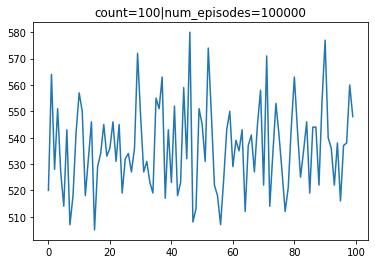

In [10]:
plot_reward(rewards,num_episodes,100)